In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # conver to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

sns.set(style= 'white', context= 'notebook', palette= 'deep')

2. 데이터 준비하기
2.1 데이터 불러오기

In [2]:
# 데이터 불러오기
train= pd.read_csv('Dataset/Digit_Recognizer/train.csv')
test= pd.read_csv('Dataset/Digit_Recognizer/test.csv')

c:\Users\82109\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

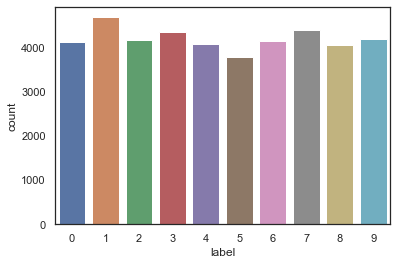

In [3]:
Y_train= train['label']

# train에서 label 특성 추출하기 
X_train= train.drop(labels= ['label'], axis= 1)

# train 삭제
del train

g= sns.countplot(Y_train)

Y_train.value_counts()

2.2 결측치 확인하기

In [6]:
# 데이터 확인하기
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

count: 784의 행이 True 혹은 False를 가지고 있다.
unique: 2라면 True와 False가 있는거고 1이라면 True 혹은 False 중 하나만 나오는 것임
top: 가장 빈번하게 있는것
freq: top값이 등장한 빈도

In [7]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

확인했는데 결측치는 없었다.

2.3 일반화
그레이스케일 일반화를 진행한다.
0~255 의 값보다 0~1 의 값이 더 빠르기 때문이다.

In [8]:
# 일반화
X_train= X_train / 255.0
test= test/ 255.0

2.4. 데이터 모양 재구성 

In [9]:
# 이미지를 3차원으로 바꾼다.
# (-1: 배열의 전체 길이를 계산해준다, 이미지 가로, 이미지 세로, 1: 데이터셋은 흑백 이미지 채널 숫자)
X_train= X_train.values.reshape(-1, 28, 28, 1)
test= test.values.reshape(-1, 28, 28, 1)

train, test는 1차원인데 3차원으로 바꾼다.
MNIST는 그레이 스케일이여서 1channel이라서 RGB 이미지 3channel로 재설정한다.

2.5 라벨 인코딩

In [10]:
# 원 핫 인코딩을 한다.
# 예: 2 → [0,0,1,0,0,0,0,0,0,0]
# 예: 1 → [0,1,0,0,0,0,0,0,0,0]
Y_train= to_categorical(Y_train, num_classes= 10)

2.6 train, val set 나누기

In [11]:
# 랜덤 시드 설정
random_seed= 2

In [12]:
# train을 val 분리
X_train, X_val, Y_train, Y_val= train_test_split(X_train, Y_train, test_size= 0.1, random_state= random_seed)

라벨의 분포가 불균형하면 stratify= True를 해줘야 한다.
라벨을 실제로 보면 더 이해하기 쉬울 것이다.

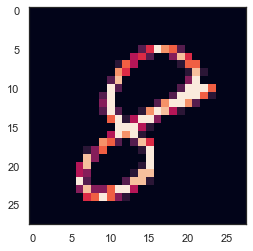

In [13]:
# 예시
g= plt.imshow(X_train[0][:,:,0])